# Retaining Interconnect Clients

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The company "Interconnect" would like to be able to accurately forecast their churn of clients and hopefully reduce their churn rate. Their plan of action is to offer specialized promotions and plan options to those customers who are identified as possibly terminating their contracts. 
<br>

The goal for this project is to train a model to accurately identify customers who might be deciding to leave the company so that Interconnect's marketing team can attempt to convince them to hold onto their contract and reduce churn rate.

</div>

## Initialization

In [6]:
# Libraries & Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

In [7]:
# Constants

plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

## Preprocessing

### Columns Formatting

In [12]:
# Importing Data

con_data = pd.read_csv('contract.csv')
per_data = pd.read_csv('personal.csv')
int_data = pd.read_csv('internet.csv')
pho_data = pd.read_csv('phone.csv')

In [13]:
# Formatting Columns

con_data.columns = con_data.columns.str.replace(r'(?<=[a-z0-9])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', '_', regex=True).str.lower()
per_data.columns = per_data.columns.str.replace(r'(?<=[a-z0-9])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', '_', regex=True).str.lower()
int_data.columns = int_data.columns.str.replace(r'(?<=[a-z0-9])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', '_', regex=True).str.lower()
pho_data.columns = pho_data.columns.str.replace(r'(?<=[a-z0-9])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', '_', regex=True).str.lower()

In [14]:
# Validating changes to column names

print("Contract Data")
print(con_data.columns)
print()

print("Personal Data")
print(per_data.columns)
print()

print("Internet Data")
print(int_data.columns)
print()

print("Phone Data")
print(pho_data.columns)

Contract Data
Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

Personal Data
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

Internet Data
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

Phone Data
Index(['customer_id', 'multiple_lines'], dtype='object')


<div style="border: 2px solid black; padding: 10px; margin: 10px">

I started with formatting the columns in each data set to avoid any unnecessary complications that could arise later due to formatting issues. Adjusted the Regex Code above to make sure the "ID" and "TV" were separated as one word and not formatted with any extra underscores.
<br>

Columns look great! Moving on to finding duplicates.

</div>

### Duplicates

#### Contract Data

In [20]:
# Contract Data

print("Contract Data")
print("=========================================================================")

duplicate_summary_con = pd.DataFrame({
    "duplicates_count": [con_data[col].duplicated().sum() for col in con_data.columns],
    "duplicates_percent": [con_data[col].duplicated().mean() * 100 for col in con_data.columns],
    "unique_values": [con_data[col].nunique() for col in con_data.columns],
    "total_rows": len(con_data)
}, index=con_data.columns)

duplicate_summary_con

Contract Data


,duplicates_count,duplicates_percent,unique_values,total_rows
customer_id,0,0.000000,7043,7043
begin_date,6966,98.906716,77,7043
end_date,7038,99.929008,5,7043
type,7040,99.957405,3,7043
paperless_billing,7041,99.971603,2,7043
payment_method,7039,99.943206,4,7043
monthly_charges,5458,77.495385,1585,7043
total_charges,512,7.269629,6531,7043


<div style="border: 2px solid black; padding: 10px; margin: 10px">

While looking at our duplicate data for the **Contract Data** set, we see there are a high rate of duplicates for `begin_date`, `end_date`, `type`, `paperless_billing`, and `payment_method`. Each of these, though, also only have a few unique values (except for `begin_date`). The others with 2-5 unique values have duplicates because of the nature of the amount of possibilities that exist for that column. In terms of `begin_date`, there could have been a promotion going on that was able to capture more customers at one time, so seeing a high percentage in this column is also expected.
<br>

We're also confirming that there are 7,043 unique customer ID's.
<br>

For this dataset, we will leave all the duplicates present as they are important pieces of information that we'll use to train our model.

</div>

#### Personal Data

In [25]:
# Personal Data

print("Personal Data")
print("=========================================================================")

duplicate_summary_per = pd.DataFrame({
    "duplicates_count": [per_data[col].duplicated().sum() for col in per_data.columns],
    "duplicates_percent": [per_data[col].duplicated().mean() * 100 for col in per_data.columns],
    "unique_values": [per_data[col].nunique() for col in per_data.columns],
    "total_rows": len(per_data)
}, index=per_data.columns)

duplicate_summary_per

Personal Data


,duplicates_count,duplicates_percent,unique_values,total_rows
customer_id,0,0.000000,7043,7043
gender,7041,99.971603,2,7043
senior_citizen,7041,99.971603,2,7043
partner,7041,99.971603,2,7043
dependents,7041,99.971603,2,7043


<div style="border: 2px solid black; padding: 10px; margin: 10px">

In our **Personal Data** set, we're again seeing unique `customer_id`'s, and based on the number of unique values, and the information they represent, we can leave these duplicates for this dataset as well since they hold important information that can help inform our model later on.

</div>

#### Internet Data

In [30]:
# Internet Data

print("Internet Data")
print("=========================================================================")

duplicate_summary_int = pd.DataFrame({
    "duplicates_count": [int_data[col].duplicated().sum() for col in int_data.columns],
    "duplicates_percent": [int_data[col].duplicated().mean() * 100 for col in int_data.columns],
    "unique_values": [int_data[col].nunique() for col in int_data.columns],
    "total_rows": len(int_data)
}, index=int_data.columns)

duplicate_summary_int

Internet Data


,duplicates_count,duplicates_percent,unique_values,total_rows
customer_id,0,0.000000,5517,5517
internet_service,5515,99.963748,2,5517
online_security,5515,99.963748,2,5517
online_backup,5515,99.963748,2,5517
device_protection,5515,99.963748,2,5517
tech_support,5515,99.963748,2,5517
streaming_tv,5515,99.963748,2,5517
streaming_movies,5515,99.963748,2,5517


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We're seeing a similar scenario here in our **Internet Data** set; the duplicates are intentional and we will keep them for training.

</div>

#### Phone Data

In [35]:
# Phone Data

print("Phone Data")
print("=========================================================================")

duplicate_summary_pho = pd.DataFrame({
    "duplicates_count": [pho_data[col].duplicated().sum() for col in pho_data.columns],
    "duplicates_percent": [pho_data[col].duplicated().mean() * 100 for col in pho_data.columns],
    "unique_values": [pho_data[col].nunique() for col in pho_data.columns],
    "total_rows": len(pho_data)
}, index=pho_data.columns)

duplicate_summary_pho

Phone Data


,duplicates_count,duplicates_percent,unique_values,total_rows
customer_id,0,0.000000,6361,6361
multiple_lines,6359,99.968558,2,6361


<div style="border: 2px solid black; padding: 10px; margin: 10px">

The duplicates in our **Phone Data** set are also intentional and will be left for training.
<br>

Next, we will uncover any missing values in our data.

</div>

### Missing Values

#### Contract Data

In [41]:
# Contract Data

print("Contract Data")
print("=========================================================================")

na_sum_con = pd.DataFrame({
    "missing_count": con_data.isna().sum(),
    "missing_percent": (con_data.isna().mean() * 100).round(2),
    "unique_values": con_data.nunique(),
    "total_rows": len(con_data)
})

# Sorting values by missing value count
na_sum_con = na_sum_con.sort_values(by="missing_count", ascending=False)

na_sum_con

Contract Data


,missing_count,missing_percent,unique_values,total_rows
customer_id,0,0.0,7043,7043
begin_date,0,0.0,77,7043
end_date,0,0.0,5,7043
type,0,0.0,3,7043
paperless_billing,0,0.0,2,7043
payment_method,0,0.0,4,7043
monthly_charges,0,0.0,1585,7043
total_charges,0,0.0,6531,7043


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No missing values.

</div>

#### Personal Data

In [46]:
# Personal Data

print("Personal Data")
print("=========================================================================")

na_sum_per = pd.DataFrame({
    "missing_count": per_data.isna().sum(),
    "missing_percent": (per_data.isna().mean() * 100).round(2),
    "unique_values": per_data.nunique(),
    "total_rows": len(per_data)
})

# Sorting values by missing value count
na_sum_per = na_sum_per.sort_values(by="missing_count", ascending=False)

na_sum_per

Personal Data


,missing_count,missing_percent,unique_values,total_rows
customer_id,0,0.0,7043,7043
gender,0,0.0,2,7043
senior_citizen,0,0.0,2,7043
partner,0,0.0,2,7043
dependents,0,0.0,2,7043


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No missing values.

</div>

#### Internet Data

In [51]:
# Internet Data

print("Internet Data")
print("=========================================================================")

na_sum_int = pd.DataFrame({
    "missing_count": int_data.isna().sum(),
    "missing_percent": (int_data.isna().mean() * 100).round(2),
    "unique_values": int_data.nunique(),
    "total_rows": len(int_data)
})

# Sorting values by missing value count
na_sum_int = na_sum_int.sort_values(by="missing_count", ascending=False)

na_sum_int

Internet Data


,missing_count,missing_percent,unique_values,total_rows
customer_id,0,0.0,5517,5517
internet_service,0,0.0,2,5517
online_security,0,0.0,2,5517
online_backup,0,0.0,2,5517
device_protection,0,0.0,2,5517
tech_support,0,0.0,2,5517
streaming_tv,0,0.0,2,5517
streaming_movies,0,0.0,2,5517


<div style="border: 2px solid black; padding: 10px; margin: 10px">

No missing values.

</div>

#### Phone Data

In [56]:
# Phone Data

print("Phone Data")
print("=========================================================================")

na_sum_pho = pd.DataFrame({
    "missing_count": pho_data.isna().sum(),
    "missing_percent": (pho_data.isna().mean() * 100).round(2),
    "unique_values": pho_data.nunique(),
    "total_rows": len(pho_data)
})

# Sorting values by missing value count
na_sum_pho = na_sum_pho.sort_values(by="missing_count", ascending=False)

na_sum_pho

Phone Data


,missing_count,missing_percent,unique_values,total_rows
customer_id,0,0.0,6361,6361
multiple_lines,0,0.0,2,6361


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We have no missing values in all of our datasets.
<br>

We'll now move on to combining all 4 dataframes into one and then continue to data type validation, date parsing, etc.

</div>

### Combining Dataframes

In [61]:
# Before combining, ensuring that 'customer_id' is the same datatype across all dataframes

print("Contract Data")
print(con_data['customer_id'].dtype)
print()

print("Personal Data")
print(per_data['customer_id'].dtype)
print()

print("Internet Data")
print(int_data['customer_id'].dtype)
print()

print("Phone Data")
print(pho_data['customer_id'].dtype)
print()

Contract Data
object

Personal Data
object

Internet Data
object

Phone Data
object



In [62]:
# Now, combining all four dataframes on 'customer_id' on an 'outer' join
# Intention is to include as much data as possible and we'll decide what to do with
# the missing values afterwards after identifying them.

df_merged = (
    con_data
    .merge(per_data, on="customer_id", how="outer")
    .merge(int_data, on="customer_id", how="outer")
    .merge(pho_data, on="customer_id", how="outer")
)

In [63]:
# Checking on duplicates for merged DF

df_merged.duplicated().sum()

0

In [64]:
# Reviewing missing values after merge

print("Merged DF")
print("=========================================================================")

na_sum_merged = pd.DataFrame({
    "missing_count": df_merged.isna().sum(),
    "missing_percent": (df_merged.isna().mean() * 100).round(2),
    "unique_values": df_merged.nunique(),
    "total_rows": len(df_merged)
})

# Sorting values by missing value count
na_sum_merged = na_sum_merged.sort_values(by="missing_count", ascending=False)

na_sum_merged

Merged DF


,missing_count,missing_percent,unique_values,total_rows
streaming_movies,1526,21.67,2,7043
streaming_tv,1526,21.67,2,7043
tech_support,1526,21.67,2,7043
device_protection,1526,21.67,2,7043
online_backup,1526,21.67,2,7043
online_security,1526,21.67,2,7043
internet_service,1526,21.67,2,7043
multiple_lines,682,9.68,2,7043
begin_date,0,0.00,77,7043
dependents,0,0.00,2,7043


<div style="border: 2px solid black; padding: 10px; margin: 10px">

All the missing values in our merged DF have only two possibilities. Since the ID's for these customers were not present in those dataframes we'll fill all the missing values with the equivalent for "No", that the customer does not have the feature of that column.

</div>

In [66]:
# Filling all missing values in the df with "No"

df_merged = df_merged.fillna("No")

# Validating no more missing values

df_merged.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

### Data Type Validation

In [70]:
# Merged Data

print("Merged Data")
print("=========================================================================")

df_merged.info()
print()

df_merged

Merged Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.60,593.3,Female,0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.90,542.4,Male,0,No,No,DSL,No,No,No,No,No,Yes,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.90,280.85,Male,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.00,1237.85,Male,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.90,267.4,Female,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,2019-01-01,No,One year,No,Mailed check,55.15,742.9,Female,0,No,No,DSL,Yes,No,No,Yes,No,No,No
7039,9992-RRAMN,2018-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,85.10,1873.7,Male,0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Yes
7040,9992-UJOEL,2019-12-01,No,Month-to-month,Yes,Mailed check,50.30,92.75,Male,0,No,No,DSL,No,Yes,No,No,No,No,No
7041,9993-LHIEB,2014-07-01,No,Two year,No,Mailed check,67.85,4627.65,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,No


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Merged Data `info()` and data displayed to validate content and datatype match. After review, we're seeing multiple changes to be made to our data before we can train our model:
<br><br>

**Datetime Data**
<ol>
    <li>First, we need to convert the 'begin_date' and 'end_date' columns to datetime</li>
    <li>We'll then create a new column where we will calculate total contract duration</li>
    <li>Next, we'll parse out the month, day and year from each 'begin_date' to help with informing seasonality</li>
    <li>Lastly, we'll create a column with <b>days since</b> the contract was ended</li>
</ol>

**Churn Data**
<ul>
    <li>We'll create this column with numerical variables for better training</li>
</ul>

**Total Charges**
<ul>
    <li>Data type for this column is in "object" type, we will convert this to 'float64'</li>
</ul>

**Encoding**
<ul>
    <li>We'll then have to encode all the numerical and categorical features before training<br>
    (This will be done after EDA section below.)</li>
</ul>

</div>

#### Making Adjustments

In [74]:
## Datetime Changes ##
# Converting 'begin_date' and 'end_date' to datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'])
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'], errors='coerce')

# Creating contract duration column
today = pd.to_datetime("today")
df_merged['contract_duration_days'] = np.where(
    df_merged['end_date'].notna(),
    (df_merged['end_date'] - df_merged['begin_date']).dt.days,
    (today - df_merged['begin_date']).dt.days
)

# Parsing 'begin' dates
df_merged['begin_year'] = df_merged['begin_date'].dt.year
df_merged['begin_month'] = df_merged['begin_date'].dt.month
df_merged['begin_dow'] = df_merged['begin_date'].dt.dayofweek

# Creating 'days since' data
df_merged['time_since_end'] = (today - df_merged['end_date']).dt.days

# Assigning '0' if still active
df_merged['time_since_end'] = df_merged['time_since_end'].fillna(0)


## Churn Column ##
# Creating churn column with numerical values
df_merged['churn'] = df_merged['end_date'].notna().astype(int)


## 'total_charges' Column ##
# Changing data type for 'total_charges' column
df_merged['total_charges'] = pd.to_numeric(df_merged['total_charges'], errors='coerce')

/var/folders/cp/t29hkt5j2055mnz846g13b000000gn/T/ipykernel_86318/2403937667.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['end_date'] = pd.to_datetime(df_merged['end_date'], errors='coerce')


In [75]:
# Validating changes were made correctly

df_merged.info()
print()
df_merged.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7043 non-null   object        
 1   begin_date              7043 non-null   datetime64[ns]
 2   end_date                1869 non-null   datetime64[ns]
 3   type                    7043 non-null   object        
 4   paperless_billing       7043 non-null   object        
 5   payment_method          7043 non-null   object        
 6   monthly_charges         7043 non-null   float64       
 7   total_charges           7032 non-null   float64       
 8   gender                  7043 non-null   object        
 9   senior_citizen          7043 non-null   int64         
 10  partner                 7043 non-null   object        
 11  dependents              7043 non-null   object        
 12  internet_service        7043 non-null   object  

customer_id                  0
begin_date                   0
end_date                  5174
type                         0
paperless_billing            0
payment_method               0
monthly_charges              0
total_charges               11
gender                       0
senior_citizen               0
partner                      0
dependents                   0
internet_service             0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
multiple_lines               0
contract_duration_days       0
begin_year                   0
begin_month                  0
begin_dow                    0
time_since_end               0
churn                        0
dtype: int64

In [76]:
# Found some NA values, correcting those
# Checking the specific rows in isolation

df_merged[df_merged['total_charges'].isna()][['customer_id', 'monthly_charges', 'total_charges']]

,customer_id,monthly_charges,total_charges
945,1371-DWPAZ,56.05,NaN
1731,2520-SGTTA,20.00,NaN
1906,2775-SEFEE,61.90,NaN
2025,2923-ARZLG,19.70,NaN
2176,3115-CZMZD,20.25,NaN
2250,3213-VVOLG,25.35,NaN
2855,4075-WKNIU,73.35,NaN
3052,4367-NUYAO,25.75,NaN
3118,4472-LVYGI,52.55,NaN
4054,5709-LVOEQ,80.85,NaN


In [77]:
## Null values in 'total_charges' wouldn't be 0 because they have a record of monthly charges
# We will fill these null values with the median value to converve them within our data

df_merged['total_charges'] = df_merged['total_charges'].fillna(df_merged['total_charges'].median())

In [78]:
# Validating no null values once more

df_merged.isna().sum()

customer_id                  0
begin_date                   0
end_date                  5174
type                         0
paperless_billing            0
payment_method               0
monthly_charges              0
total_charges                0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
internet_service             0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
multiple_lines               0
contract_duration_days       0
begin_year                   0
begin_month                  0
begin_dow                    0
time_since_end               0
churn                        0
dtype: int64

<div style="border: 2px solid black; padding: 10px; margin: 10px">

We have all the necessary features and data that we need for proper model training moving forward. All the data is also formatted correctly and we effectively located and addressed any null or missing values in our data.
<br>

There are some columns that we will not include in the model training because they are not relevant for target prediction. We will select those features after the **EDA** section.
<br>

Let's now move forward to some **EDA** to give us a better understanding of the data.

</div>

## EDA

### Male/Female Distribution

Text(0.5, 1.0, 'Churn Distribution by Gender')

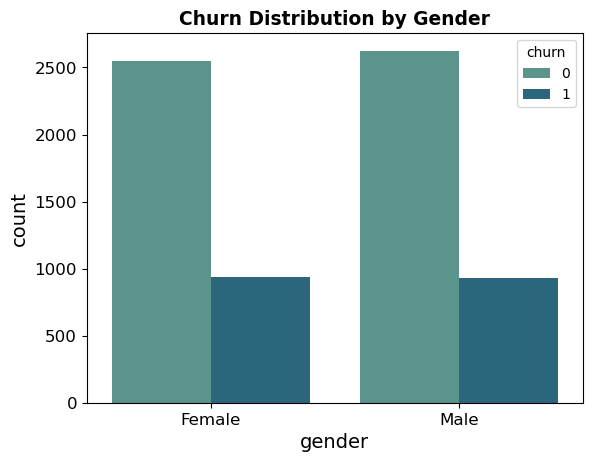

In [84]:
sns.countplot(data=df_merged, x='gender', hue='churn', palette='crest')
sns.set_context("paper", font_scale=1.4)
plt.title('Churn Distribution by Gender')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The intention here was to find if there was a skew towards a specific gender when it came to churn rate. It appears that there is no skew to either gender in terms of churn rate based on the distribution above.

</div>

### Total Charges VS Contract Type

Text(0.5, 1.0, 'Total Charges by Contract Type and Churn')

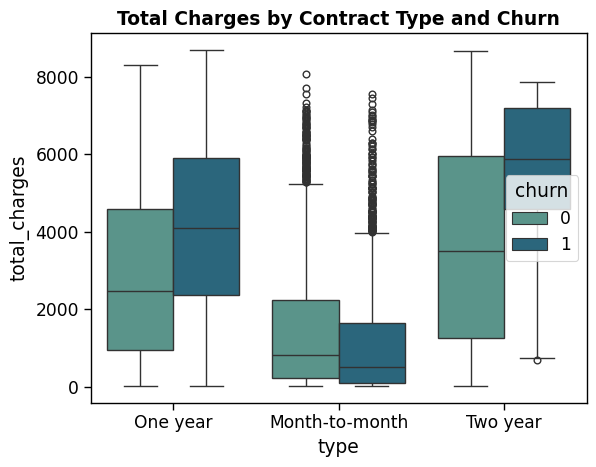

In [89]:
sns.boxplot(data=df_merged, x='type', y='total_charges', hue='churn', palette='crest')
sns.set_context("paper", font_scale=1.4)
plt.title('Total Charges by Contract Type and Churn')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

For the <b>1 Year</b> and <b>2 Year</b> contracts, the churn rate increases immensely implying that the longer the contract, the higher the total charges, lead customers to cancelling their memberships.

</div>

### Payment Method VS Churn

Text(0.5, 1.0, 'Churn by Payment Method')

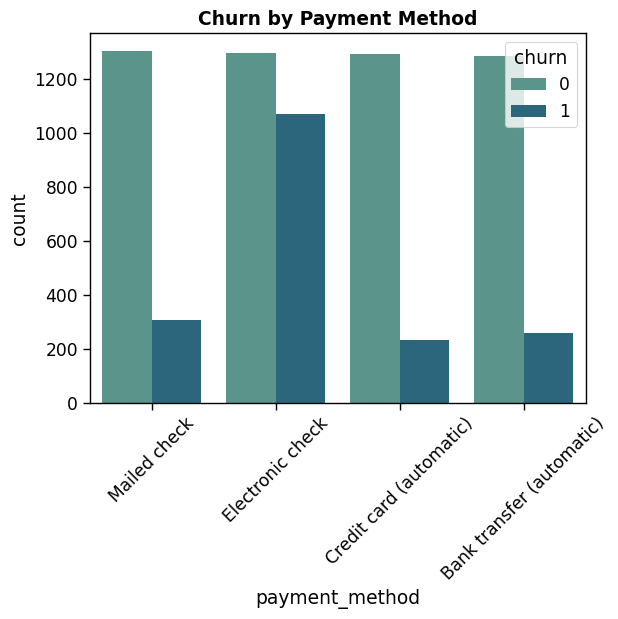

In [94]:
sns.countplot(data=df_merged, x='payment_method', hue='churn', palette='crest')
sns.set_context("paper", font_scale=1.4)
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Electronic Checks yield the greatest churn rate compared to the other payment methods. This could be because of additioinal service charges for submitting electronic checks, or some other kind of inconvenience. Automatic payments seems to work the best.

</div>

### Contract Lifecycle

#### Contract Start Month

Text(0.5, 1.0, 'Churn by Contract Start Month')

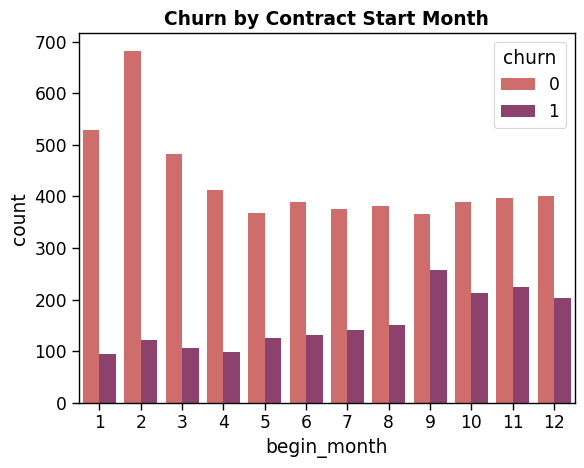

In [100]:
sns.countplot(data=df_merged, x='begin_month', hue='churn', palette='flare')
sns.set_context("paper", font_scale=1.4)
plt.title('Churn by Contract Start Month')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

When we look at Contract Start Month, we see that customers who started their subscription with the company between the months of <b>January</b> and <b>August</b> are less likely to cancel their membership than if they started their subscription in the months of <b>September</b> through <b>December</b>. This could be related to certain marketing strategies being executed during those times and then later, once the promotional periods end, the customers don't like the trade off they get.

</div>

#### Contract Duration Distribution

Text(0.5, 1.0, 'Distribution of Contract Duraction by Churn')

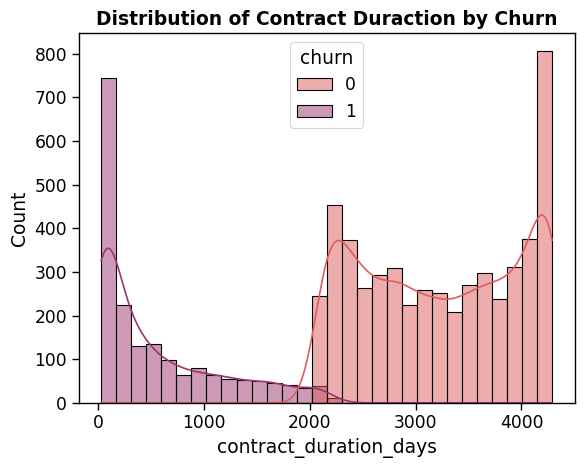

In [105]:
sns.histplot(data=df_merged, x='contract_duration_days', hue='churn', bins=30, kde=True, palette='flare')
sns.set_context("paper", font_scale=1.4)
plt.title('Distribution of Contract Duraction by Churn')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

As we look at contract duration in relation to churn rate, we see that the longer customers stay with the company the less likely they are to terminate their membership. More focus should be directed towards what, in those first few years, keeps customers or scares them away.

</div>

#### Start-Date Trends (Churn Timing)

/var/folders/cp/t29hkt5j2055mnz846g13b000000gn/T/ipykernel_86318/3243784161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged[df_merged['churn']==1], x='end_month', palette='flare')


Text(0.5, 1.0, 'Churned Customer End Dates by Month')

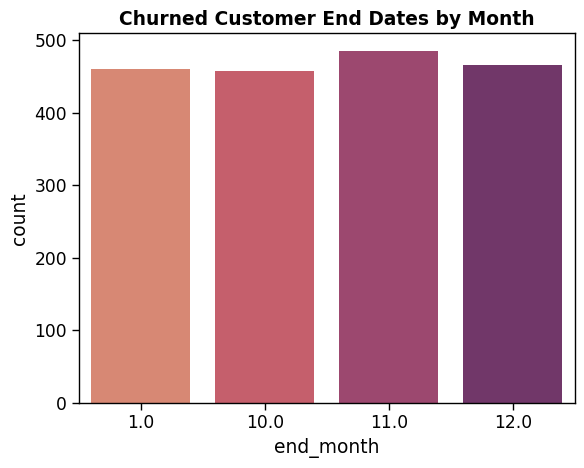

In [110]:
df_merged['end_month'] = df_merged['end_date'].dt.month
sns.countplot(data=df_merged[df_merged['churn']==1], x='end_month', palette='flare')
sns.set_context("paper", font_scale=1.4)
plt.title("Churned Customer End Dates by Month")

<div style="border: 2px solid black; padding: 10px; margin: 10px">

From our End Dates by Month visual, we see that customers only really cancel their memberships within a 4 month timespan: <b>October</b> to <b>January</b>. Promotions that run about a year long would be the culprits in this scenario where people would cancel their memberships right after the promotional period ends.

</div>

### Service Features & Usage Patterns

#### Internet Service Type

Text(0.5, 1.0, 'Churn by Internet Service Type')

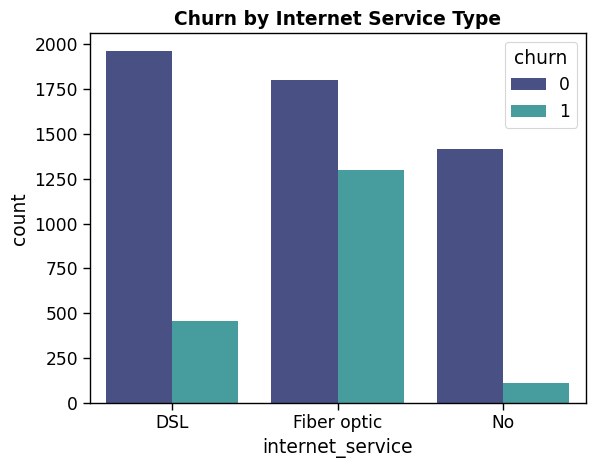

In [116]:
sns.countplot(data=df_merged, x='internet_service', hue='churn', palette='mako')
sns.set_context("paper", font_scale=1.4)
plt.title("Churn by Internet Service Type")

<div style="border: 2px solid black; padding: 10px; margin: 10px">

We'd have to understand more closely the details pertaining to this factor in our analysis, but it seems that those customers with <b>Fiber Optic</b> internet service are the ones cancelling their memberships the most. But, given that the majority of the customers, in fact, do have the fiber optic service, the implications of this graph could be less influential in future business decisions.

</div>

#### Add-On Services

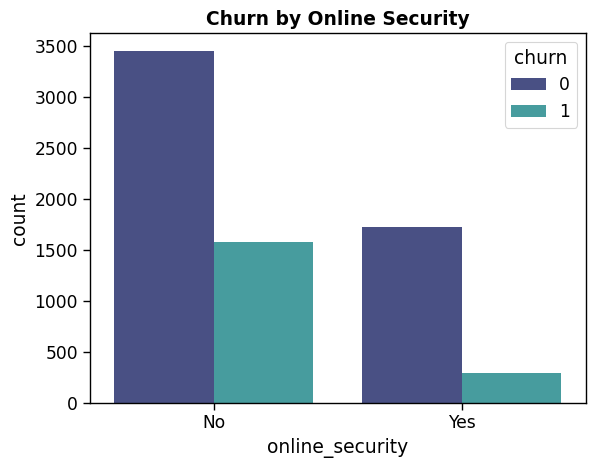

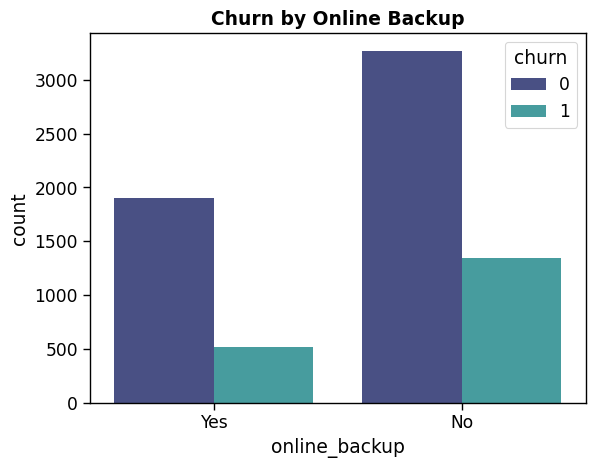

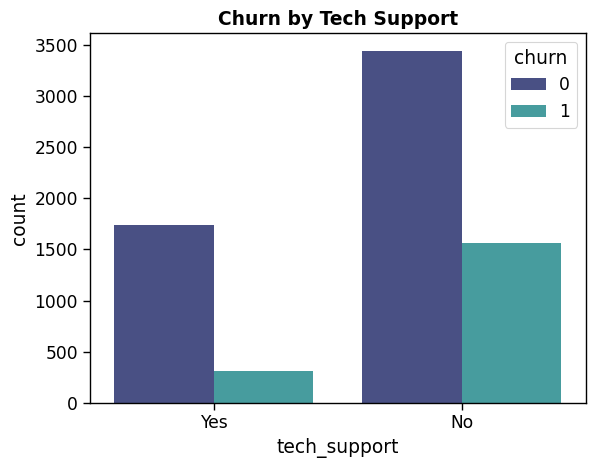

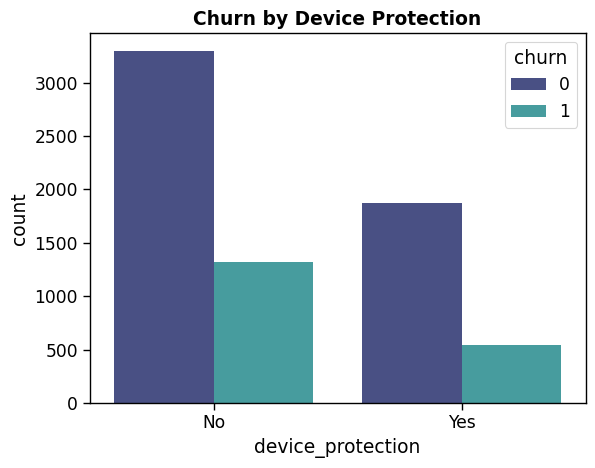

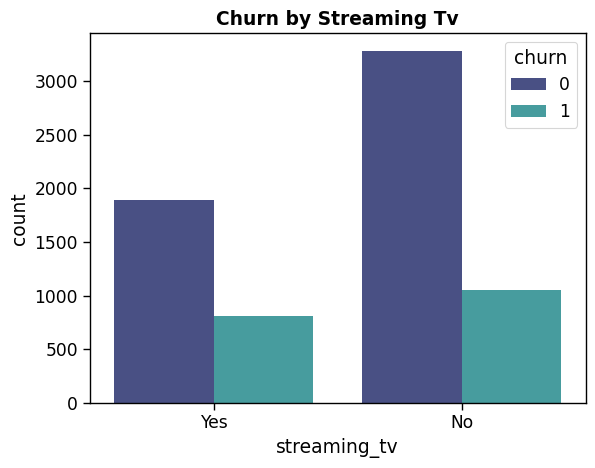

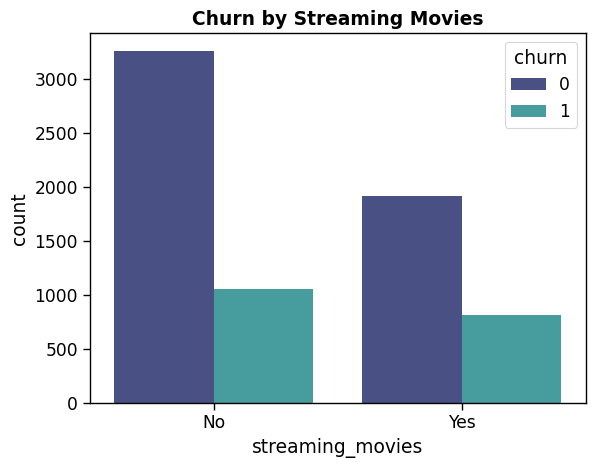

In [121]:
service_cols = ['online_security', 'online_backup', 'tech_support', 'device_protection', 
                'streaming_tv', 'streaming_movies']
for col in service_cols:
    sns.countplot(data=df_merged, x=col, hue='churn', palette='mako')
    sns.set_context("paper", font_scale=1.4)
    plt.title(f"Churn by {col.replace('_', ' ').title()}")
    plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

In every instance of our "add-ons" the churn rate is lower for customers who included this add-on in their membership. More focus on add-on features and bundles could help impact churn rates the most based on this data.

</div>

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features and Churn')

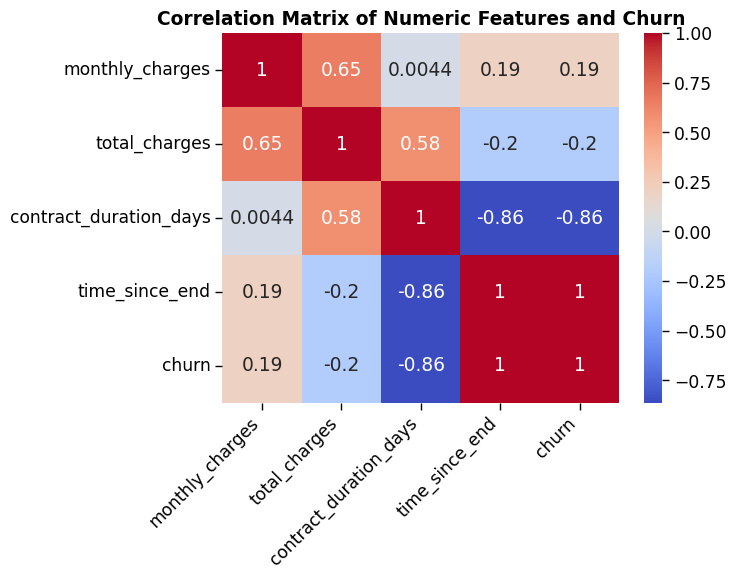

In [126]:
numeric_cols = ['monthly_charges', 'total_charges', 'contract_duration_days', 'time_since_end']
sns.heatmap(df_merged[numeric_cols + ['churn']].corr(), annot=True, cmap='coolwarm')
sns.set_context("paper", font_scale=1.4)
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix of Numeric Features and Churn")

<div style="border: 2px solid black; padding: 10px; margin: 10px">

As we take a look at our numeric features heatmap, we're seeing a strong relationship between `monthly_charges` and `total_charges` and later `total_charges` and `contract_duration_days`. This leads to the conclusion that the customers who churned were paying higher rates in their memberships than those customers who stayed with the company. 

</div>

### Churn Overview

Text(0, 0.5, '')

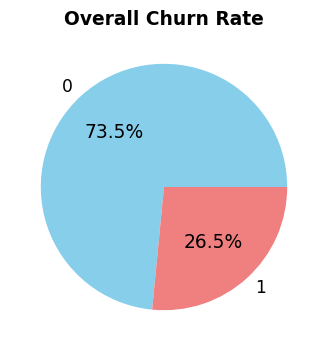

In [131]:
plt.figure(figsize=(4,4))
df_merged['churn'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
sns.set_context("paper", font_scale=1.4)
plt.title("Overall Churn Rate")
plt.ylabel('')

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Overall, we see a 26.5% churn rate for the company. That's more than a quarter of their business. Strategic moves need to be made to close that gap and to hold onto customers to maximize earnings. 

</div>

## Model Training

### Building Pipeline

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Here, we're beginning the setup for feature encoding and, later, model training.

</div>

In [138]:
# Removing 'end_date' column as its value is in "churn" column
# Also removing columns with "future" data that would skew outcome

df_merged = df_merged.drop(columns=['end_date', 'contract_duration_days', 'time_since_end'])

In [139]:
# Isolating numerical features
numeric_features = [
    'monthly_charges',
    'total_charges',
    'begin_year',
    'begin_month',
    'begin_dow',
    'senior_citizen'
]

# Isolating categorical features
categorical_features = [
    'type',
    'paperless_billing',
    'payment_method',
    'gender',
    'partner',
    'dependents',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines'
]

# Removing columns not used for modeling
drop_columns = ['customer_id', 'begin_date', 'churn']

# Creating feature matrix
X = df_merged.drop(columns=drop_columns)
y = df_merged['churn']

In [140]:
# Building Pipeline

# First, the Preprocessors
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Creating modeling pipeline for LR Model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

### Splitting Data

In [144]:
# Splitting the data into train, test, and validation sets
# First split for train and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split, into test and validation sets (15% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### LogisticRegression Model

In [148]:
# Training the LR Model Baseline

clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred_base = clf.predict(X_valid)
y_val_proba_base = clf.predict_proba(X_valid)[:, 1]

val_acc_base = accuracy_score(y_valid, y_val_pred_base)
val_auc_base = roc_auc_score(y_valid, y_val_proba_base)

print(f"Validation Accuracy Baseline: {val_acc_base:.2f}")
print(f"Validation AUC-ROC Baseline:  {val_auc_base:.2f}")

Validation Accuracy Baseline: 0.83
Validation AUC-ROC Baseline:  0.85


In [150]:
# Finding best params for LR Model

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    clf, 
    param_grid, 
    scoring='roc_auc', 
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best AUC-ROC:", grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best AUC-ROC: 0.8420604528400959


In [152]:
# Training the LR Model with best params

best_model_lr = grid.best_estimator_

# Predict on validation set
y_val_pred_bestlr = best_model_lr.predict(X_valid)
y_val_proba_bestlr = best_model_lr.predict_proba(X_valid)[:, 1]

val_acc_bestlr = accuracy_score(y_valid, y_val_pred_bestlr)
val_auc_bestlr = roc_auc_score(y_valid, y_val_proba_bestlr)

print(f"Validation Accuracy: {val_acc_bestlr:.2f}")
print(f"Validation AUC-ROC:  {val_auc_bestlr:.2f}")

Validation Accuracy: 0.83
Validation AUC-ROC:  0.85


### RandomForest Model

In [156]:
# Creating pipeline for RF Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [158]:
# Baseline scores for RF Model
# Fitting with train set
rf_pipeline.fit(X_train, y_train)

# Predictions
y_val_pred_rfbase = rf_pipeline.predict(X_valid)
y_val_proba_rfbase = rf_pipeline.predict_proba(X_valid)[:, 1]

# Metrics
val_acc_rfbase = accuracy_score(y_valid, y_val_pred_rfbase)
val_auc_rfbase = roc_auc_score(y_valid, y_val_proba_rfbase)

print(f"Validation Base Accuracy: {val_acc_rfbase:.2f}")
print(f"Validation Base AUC-ROC:  {val_auc_rfbase:.2f}")

Validation Base Accuracy: 0.86
Validation Base AUC-ROC:  0.89


In [160]:
# Finding best params for RF Model

param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__max_features': ['sqrt'],
    'classifier__class_weight': [None, 'balanced']
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best Validation AUC-ROC:", rf_grid.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__max_depth=None, classifier__max_featu

In [162]:
# Training the LR Model with best params

best_rf = rf_grid.best_estimator_

# Predict on validation set
y_val_pred_bestrf = best_rf.predict(X_valid)
y_val_proba_bestrf = best_rf.predict_proba(X_valid)[:, 1]

val_acc_bestrf = accuracy_score(y_valid, y_val_pred_bestrf)
val_auc_bestrf = roc_auc_score(y_valid, y_val_proba_bestrf)

print(f"Validation Accuracy: {val_acc_bestrf:.2f}")
print(f"Validation AUC-ROC:  {val_auc_bestrf:.2f}")

Validation Accuracy: 0.86
Validation AUC-ROC:  0.89


## AUC-ROC Evaluation

### LogisticRegression Test

In [167]:
# AUC-ROC Evaluation on Test Set for LR

# Predict on test set
y_test_pred_lrtest = best_model_lr.predict(X_test)
y_test_proba_lrtest = best_model_lr.predict_proba(X_test)[:, 1]

test_acc_lrtest = accuracy_score(y_test, y_test_pred_lrtest)
test_auc_lrtest = roc_auc_score(y_test, y_test_proba_lrtest)

print(f"Test Accuracy: {test_acc_lrtest:.2f}")
print(f"Test AUC-ROC:  {test_auc_lrtest:.2f}")

Test Accuracy: 0.80
Test AUC-ROC:  0.83


### RandomForest Test

In [171]:
# AUC-ROC Evaluation on Test Set for RF

# Predict on test set
y_test_pred_rftest = best_rf.predict(X_test)
y_test_proba_rftest = best_rf.predict_proba(X_test)[:, 1]

test_acc_rftest = accuracy_score(y_test, y_test_pred_rftest)
test_auc_rftest = roc_auc_score(y_test, y_test_proba_rftest)

print(f"Test Accuracy: {test_acc_rftest:.2f}")
print(f"Test AUC-ROC:  {test_auc_rftest:.2f}")

Test Accuracy: 0.84
Test AUC-ROC:  0.87


## Conclusions

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<b><u>Model Overview</b></u><br>
We used a Logistic Regression model that was developed to predict customer churn based on "pre-churn" factors such as contract type, payment method, service subscriptions, and some demographic indicators.<br>
All features were engineered to reflect information available <b>prior to churn</b>, preventing data leakage and ensuring that model performance represents a realistic predictive scenario.<br>
We also compared the LR Model to a RandomForest Model and found that it did a much better job at predicting customer churn.
<br><br>

<b><u>Performance Summary (Test Data)</b></u><br>
<u>LogisticRegression Model</u>
<ul>
    <li>Test Accuracy: &#8776;<b>0.80</b></li>
    <li>Test AUC-ROC: &#8776;<b>0.85</b></li>
</ul>
<u>RandomForest Model</u>
<ul>
    <li>Test Accuracy: &#8776;<b>0.85</b></li>
    <li>Test AUC-ROC: &#8776;<b>0.89</b></li>
</ul>

Based on the highest AUC score from our RF Model of 0.89, this suggests that the model captures underlying behavioral difference between customers who churn and those who stay. The model also demonstrates <b>strong discriminatory power</b>; it correctly distinguishes churned customers from retained ones 89% of the time.<br>

Also, the close alignment between training and testing accuracy indicates <b>low overfitting</b> and solid generalization.
<br><br>

<b><u>Interpretation of Results</b></u><br>
<ul>
    <li>Customers on <b>month-to-month</b> contracts and those using <b>electronic check</b> payments are statistically more likely to churn.</li>
    <li>Customers with <b>longer-term contract</b> or who subscribe to <b>multiple add-on services</b> (such as online security, device protection, etc.) show lower churn rates suggesting retention through bundled value.</li>
</ul>
<br>

<u><b>Business Impact</b></u><br>
<ul>
    <li>The predictive accuracy and ROC performance indicate the model can be used as a <b>customer rick-scoring tool</b></li>
    <li>This allows the company to know, ahead of time, whether a customer is "at-risk" and can proactively offer <u>loyalty discounts</u> or <u>service upgrades</u>.</li>
    <li>Even just a small reduction in churn rate could help the company increase in recurring revenue significantly.</li>
</ul>

</div>